<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         416 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                           

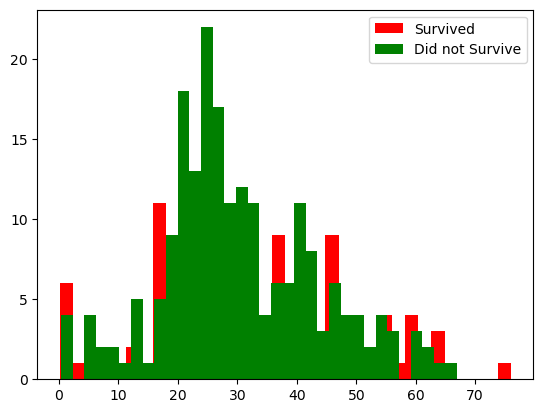

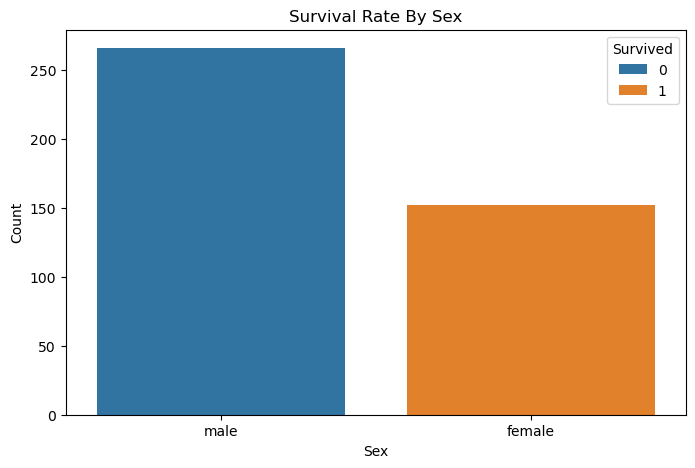

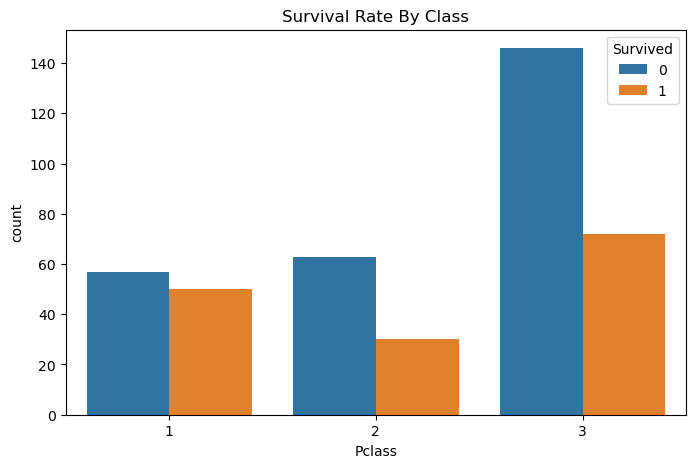

C:\Users\USER\AppData\Local\Temp\ipykernel_15772\2299931383.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_data.fillna(method='ffill', inplace=True)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the data using a raw string literal
#file_path = r'C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\tested4.xlsx'
#titanic_data = pd.read_excel(file_path)
file_path = r'C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\tested.csv'
titanic_data = pd.read_csv(file_path)


# Basic data info
titanic_data.info()
print(titanic_data.head())
print(titanic_data.duplicated().sum())

# Plot histograms
plt.hist(titanic_data[titanic_data['Survived'] == 1]['Age'], color='red', label='Survived', bins=34)
plt.hist(titanic_data[titanic_data['Survived'] == 0]['Age'], color='green', label='Did not Survive', bins=34)
plt.legend()
plt.show()

# Countplot for Survival Rate by Sex
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Rate By Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Countplot for Survival Rate by Class
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Rate By Class')
plt.show()

# Handle missing data if any
titanic_data.fillna(method='ffill', inplace=True)



In [4]:
# Drop non-numeric columns that are not useful for modeling
titanic_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Convert categorical features into numeric using LabelEncoder (for 'Sex' and 'Embarked')
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

# If you have a column like 'Embarked', you can encode it similarly
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Split the data into features and labels
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



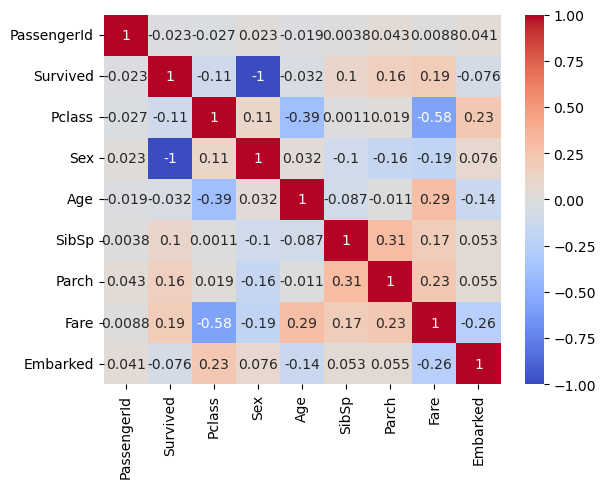

In [5]:
# Correlation matrix
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


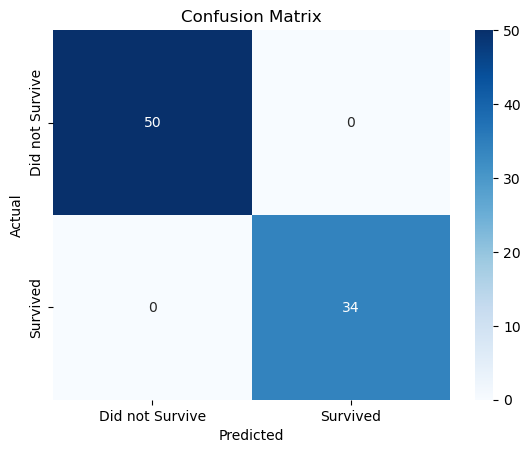

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Did not Survive", "Survived"], yticklabels=["Did not Survive", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


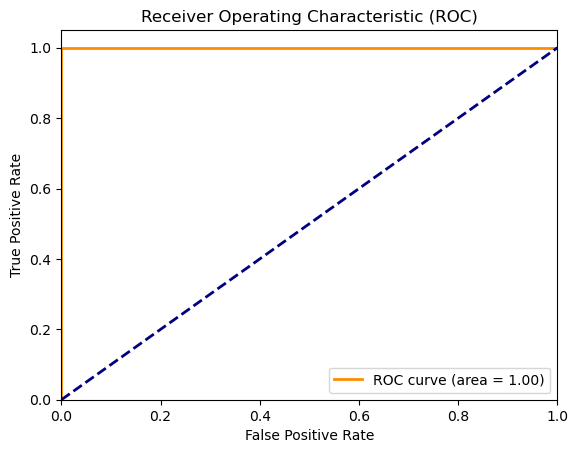

In [7]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
# Train the final model with best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions and evaluate the model
y_pred_final = best_rf_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final Classification Report:")
print(classification_report(y_test, y_pred_final))


Final Accuracy: 1.0
Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [10]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'random_forest_titanic_model.pkl')

# Load the model from file
# loaded_model = joblib.load('random_forest_titanic_model.pkl')


['random_forest_titanic_model.pkl']

In [21]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the saved model
loaded_model = joblib.load('random_forest_titanic_model.pkl')

# Load the new dataset
new_data = pd.read_csv(r'C:\Users\USER\Downloads\titanic(1)\test.csv')

# Preprocess the new data (replicate the same preprocessing steps)
new_data.fillna(method='ffill', inplace=True)
new_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
label_encoder = LabelEncoder()
new_data['Sex'] = label_encoder.fit_transform(new_data['Sex'])
if 'Embarked' in new_data.columns:
    new_data['Embarked'] = label_encoder.fit_transform(new_data['Embarked'])

# Ensure the new data has the same features as the training data
# No need to drop 'Survived' since it's not in the new dataset
X_new = new_data  # Adjust as needed for your target variable

# Use the loaded model to make predictions on the new dataset
predictions = loaded_model.predict(X_new)

# Output predictions
print(predictions)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\USER\AppData\Local\Temp\ipykernel_15772\1210473848.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data.fillna(method='ffill', inplace=True)


In [22]:
output = new_data[['PassengerId', 'Sex', 'Age']].copy()
output['Survived'] = predictions
output.to_csv('titanic_predictions.csv', index=False)
print("Predictions saved to titanic_predictions.csv")


Predictions saved to titanic_predictions.csv


In [23]:
import os
print(os.getcwd())

C:\Users\USER
